### Exploring Survival on the Titanic
by Mohamad Zeini Jahromi

## Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
## Question
In this study, the main question is what sorts of people were likely to survive. We will use the data to answer the stated question. We are going to analyze the observational differences and draw some tentative conclusions but we won't validate our observations with statistical measurements. 

## Data Exploration
Variables in the data file are as follows:
          
- survival        = Survival (0 = No; 1 = Yes)
- pclass          = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name            = Name
- sex             = Sex (female; male)
- age             = Age
- sibsp           = Number of Siblings/Spouses Aboard
- parch           = Number of Parents/Children Aboard
- ticket          = Ticket Number
- fare            = Passenger Fare
- cabin           = Cabin
- embarked        = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

First, the data is imported and the heading are examined.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
# load and check data heading
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


let's check our data statistics and see which variables are more interesting to investigate.
 

In [2]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 passenger only %38 of them (342) survived and 549 not.

Let's split our data into two groups of *survived* and *not_survived* and explore their statistics more.



In [3]:
# getting data statistics
titanic_data.groupby(['Survived']).describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

**Pclass** and **Parch** variables have a significant difference based on their mean, minimum, maximum and standard deviation values and we are planning to investigate them. In addition, we will check **Age** and **SibSp** for any exceptions. We cannot see any statistics regarding **Sex** variable here and it's because of its type (String). We will fix that issue and include it in our analysis as well.
In short, we decided to investigate the following variables (as independent variables) and see how they are affecting the people's survival (as a dependent variable).

- age             = Age
- sibsp           = Number of Siblings/Spouses Aboard
- parch           = Number of Parents/Children Aboard
- sex             = Sex (female; male)
- pclass          = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

## Data Cleaning
The following issues are addressed in this section.
1. The **Sex** column variable type is *String* and we replace it with integer values (0 for female and 1 for male) so we are able to investigate and analyze it further.
2. The number of **Age** variable (714) are less than others (891). After a quick check we found out that some of the rows don't have entry for the **Age** column and we will remove them from our data set and continue the study with the rest.


In [4]:
# chechinkg data types
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1036]:
# removing rows with no entery for Age 
titanic_data_clean = titanic_data[titanic_data['Age'] >= 0]

# funtion for replacing Sex coloumn enteries with integer values
def Sex_to_index(string):
    if string == 'male':
        return int(1)
    elif string == 'female':
        return int(0)
    return string

# replacing Sex coloumn enteries with integer values
titanic_data_clean_mod = titanic_data_clean.applymap(Sex_to_index)
titanic_data_clean_mod.groupby(['Survived']).describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  424.000000  424.000000   424.000000  424.000000   
         mean    30.626179   22.965456    0.365566   442.299528    2.485849   
         std     14.172110   31.448825    0.878341   264.739548    0.743633   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.895800    0.000000   200.750000    2.000000   
         50%     28.000000   11.887500    0.000000   436.000000    3.000000   
         75%     39.000000   26.550000    0.000000   683.250000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  290.000000  290.000000   290.000000  290.000000   
         mean    28.343690   51.843205    0.527586   457.768966    1.872414   
         std     14.950952   70.458776    0.807147   250.845515    0.836617   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   13.000000    0.000000   260.500000    1.000000   
         50%     28.000000   26.250000    0.000000   452.000000    2.000000   
         75%     36.000000   66.200000    1.000000   669.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                       Sex       SibSp  
Survived                                
0        count  424.000000  424.000000  
         mean     0.849057    0.525943  
         std      0.358417    1.044760  
         min      0.000000    0.000000  
         25%      1.000000    0.000000  
         50%      1.000000    0.000000  
         75%      1.000000    1.000000  
         max      1.000000    5.000000  
1        count  290.000000  290.000000  
         mean     0.320690    0.493103  
         std      0.467548    0.731132  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      1.000000    1.000000  
         max      1.000000    4.000000

Now we can see a significant difference between **Sex** variable means. 

As we mentioned before, the data set will be split into two groups of *survived* and *not_survived*.


In [1027]:
# split data into two groups of survived and not_survived
survived=titanic_data_clean_mod[titanic_data_clean_mod['Survived']==1]
not_survived = titanic_data_clean_mod[titanic_data_clean_mod['Survived']==0]

## Analysis
### Age
The first variable to investigate is **Age**.
Most of survived and not survived people belong to ages between 20 to 40. The shape of both histograms are similar except for these two groups.
- Children of 5 years old and younger were more likely to survive.
- Passengers older than 65 years had a lowest survival chance.


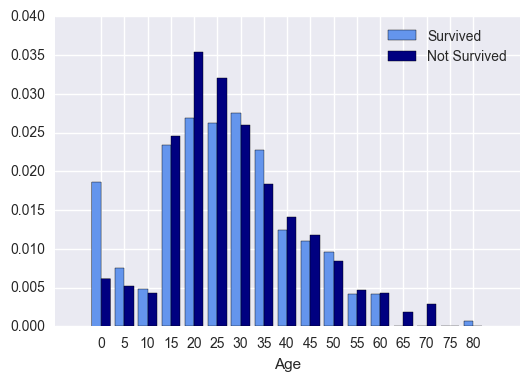

In [1028]:
# plotting hisogram for Age variables of both groups
plt.hist([survived_mod['Age'], not_survived_mod['Age']], bins=range(0, 85 + 1, 5), normed=True, 
         color=['cornflowerblue', 'navy'], label=['Survived', 'Not Survived'], align='left')
plt.xlabel('Age')
plt.xticks(range(0, 85, 5))
plt.legend()   

### Siblings/Spouses Aboard
Next figure demonstrates that, passengers with no relatives had a slightly lower chance of survival and those with only one relative aboard had a better chance of survival. 

However, these differences are not significant as it's shown in the table of statistics before.


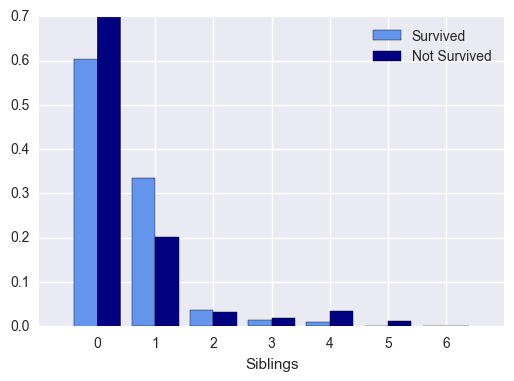

In [1029]:
plt.hist([survived['SibSp'], not_survived['SibSp']], bins=range(0, 7 + 1, 1), normed=True, 
         color=['cornflowerblue', 'navy'], label=['Survived', 'Not Survived'], align='left')
plt.xlabel('Siblings')
plt.xticks(range(0, 7))
plt.legend()                           

### Parent and Children
Following plot shows that in general, single passengers had a lower chance of survival compering to family members. Having 1 or 2 family members seems to increase the chance of survival but not more than that. 

We consider the effect of this variable (having Parent and Children) relatively significant.


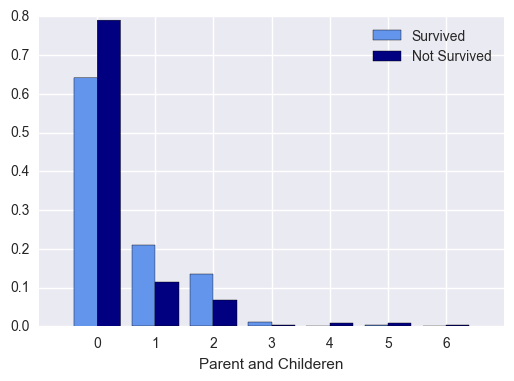

In [1030]:
plt.hist([survived['Parch'], not_survived['Parch']], bins=range(0, 7 + 1, 1), normed=True, 
         color=['cornflowerblue', 'navy'], label=['Survived', 'Not Survived'], align='left')
plt.xlabel('Parent and Childeren')
plt.xticks(range(0, 7))
plt.legend()

### Female and Male
Comparing the bar proportions in the following histogram plot, we can see a huge difference between female and male chance of survival. Females passengers had survived the shipwreck almost four times more than male passengers.

We consider the effect of this variable (Sex) highly significant on survival.

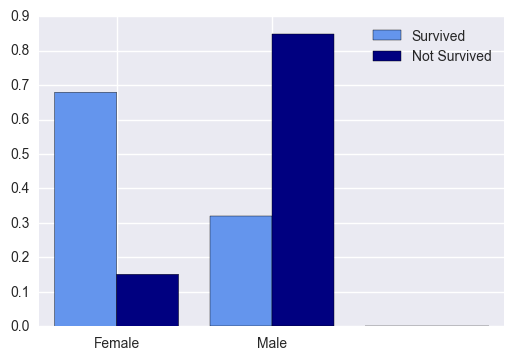

In [1031]:
plt.hist([survived_mod['Sex'], not_survived_mod['Sex']], bins=range(0, 3 + 1, 1), normed=True, 
         color=['cornflowerblue', 'navy'], label=['Survived', 'Not Survived'], align='left')
plt.xlabel('')
plt.xticks(range(0, 2),['Female','Male'])
plt.legend()

### Passenger Class
Based on next figure, the passengers in *1st Class* had survived more than others and the passengers in *3rd Class* were the most unfortunate. 

After Sex variable, we consider the effect of this variable (Passenger Class) highly significant on survival of passengers.

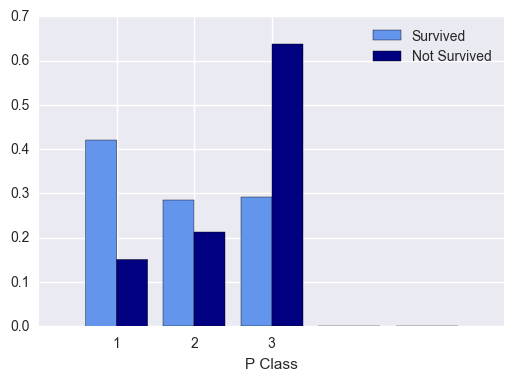

In [1032]:
plt.hist([survived['Pclass'], not_survived['Pclass']], bins=range(1, 6 + 1, 1), normed=True, 
         color=['cornflowerblue', 'navy'], label=['Survived', 'Not Survived'], align='left')
plt.xlabel('P Class')
plt.xticks(range(1, 4))
plt.legend()

### Female / Male + Passenger Class
The following two plots show the combined effects of **Sex** and **Pclass** variables on the chance of survival.
It seems that *Females in 1st and 2nd Class* have the highest chance of the survival and *Males in 3rd Class* have the lowest chance.

The pie plot of passengers grouped by Survival, Class and Sex is shown in the last figure.

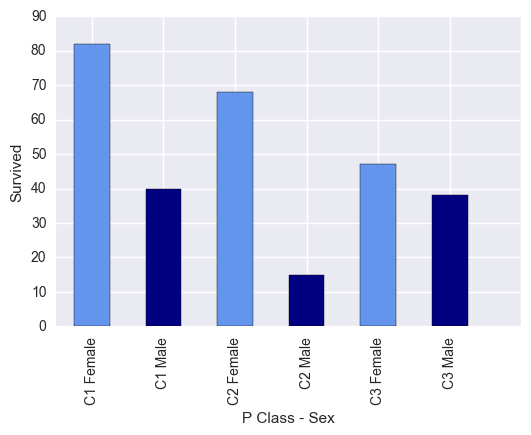

In [1033]:
t= survived.groupby(['Pclass','Sex']).count()['Survived']
t.plot(kind='bar', color=['cornflowerblue','navy']) 
plt.xticks(range(0, 7),['C1 Female', 'C1 Male', 'C2 Female','C2 Male', 'C3 Female','C3 Male'])
plt.xlabel('P Class - Sex')
plt.ylabel('Survived')

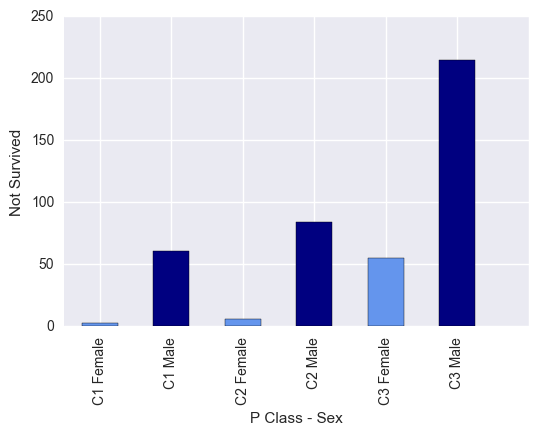

In [1034]:
t= not_survived.groupby(['Pclass','Sex']).count()['Survived']
t.plot(kind='bar', color=['cornflowerblue','navy']) 
plt.xticks(range(0, 7),['C1 Female', 'C1 Male', 'C2 Female','C2 Male', 'C3 Female','C3 Male'])
plt.xlabel('P Class - Sex')
plt.ylabel('Not Survived')

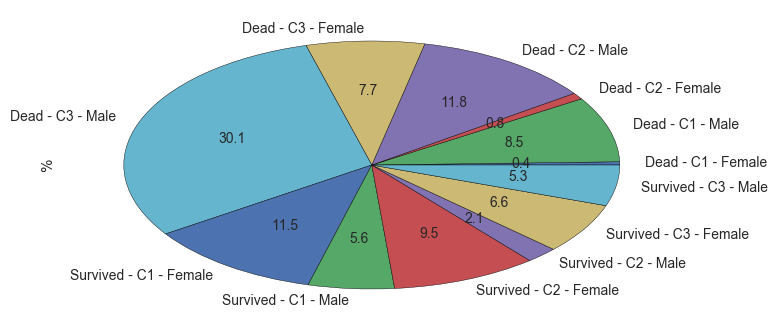

In [1042]:
# pie plot of all the passengers grouped by Survival, P Class and Sex
grouped_by_Sur_Clas_Sex = titanic_data_clean_mod.groupby(['Survived','Pclass','Sex']).count()['PassengerId']
lbls=['Dead - C1 - Female','Dead - C1 - Male','Dead - C2 - Female','Dead - C2 - Male','Dead - C3 - Female',
        'Dead - C3 - Male','Survived - C1 - Female','Survived - C1 - Male','Survived - C2 - Female',
        'Survived - C2 - Male','Survived - C3 - Female','Survived - C3 - Male']
grouped_by_Sur_Clas_Sex.plot(kind='pie', autopct='%.1f', subplots=True, figsize=(8, 4), labels=lbls)
plt.ylabel('%')


### Conclusions
Based on our explorations and observations we can say; 
- **Female passengers and 1st Class passengers** are more likely to survive the shipwreck while being **Male and 3rd Class passenger** seems to be a tragedy. 
- Moreover, it seems **Children under 5 years old** have a high chance of survival not because of their abilities but the special attention they get from others.
- Finally **Old people (older than 65 years)** are not likely to survive the shipwreck.

### Limitations
As mentioned before in Introduction, all the observations in this analysis are tentative since no statistical significant analysis were performed. To rigorously check how likely it would be to see these results by random chance, we need to use statistics. 

Moreover, our investigation shows some correlation between our independent variables (**Sex** and **Pclass**) and dependent variable (**Survival**) but it does not imply any causation. Some third factors could cause the correlation between our variables. Factors like;
- Passenger’s ability to swim
- How far passengers were located from evacuation boats 
- Which group had more life jackets and rescue boats 
- Were there any priorities for passengers to get on rescue boats first

And since we do not know about these third factors, we cannot make any statement of causation. To find out whether one change causes another, we need to run some experiments (like A/B tests)

In addition, some variables, like **Siblings and Spouses Aboard** and **Parent and Children Aboard**, are general and to some extent vague. It does not distinguish between **Parents** and **Children**, or **Siblings** and **Spouses**. I think, in reality it's a one-directional factor meaning; Children, wives and old parents get more support and help from parents, husbands and sons (not the other way around) which can significantly change their survival chance. In this study we assumed that these factors are two-directional which could affect our conclusions.

One more aspect of the data set that could be explored more in detail is **Passengers Name**. One could investigate and see which passengers are famous, rich, celebrity, or athlete and how those characteristics affect their survival rate.
